<a href="https://colab.research.google.com/github/CheYuuuu/TensorFlow/blob/main/BasicImgClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 流程

1. 載入資料集(建議查看資料的形式再進行下一步)

2. 資料預處理(壓縮圖片像素)

3. 載入適當模型

4. 編譯模型(選擇loss function和optimizer)

5. 訓練模型(fit)

6. 測試模型(predict)

7. 使用模型(載入圖片>預處理圖片>預測>結果)

In [50]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline 
#可以不用每個cell都打plt.show()
#print(tf.__version__) #看tf的版本

In [51]:
fashion_mnist = tf.keras.datasets.fashion_mnist #導入dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #分集處理(訓練集、測試集)

In [52]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #定義資料欄位名稱

In [53]:
len(train_labels) #檢查訓練集資料量

60000

In [54]:
len(test_labels) #檢查測試集資料量

10000

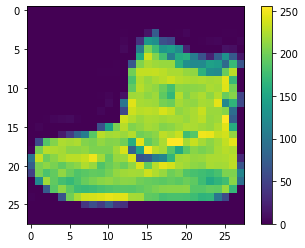

In [55]:
#確認圖有無導入成功
plt.figure() #建立圖形框架
plt.imshow(train_images[0]) #顯示指定圖再已設框架內
plt.colorbar() #顯示colorbar
plt.grid(False) #關掉預設網格

In [56]:
#資料預處理
train_images = train_images/255.0
test_images = test_images/255.0
#由於RGB組成會有255個像素,
#因此除以255讓範圍變成0~1才能餵進類神經網絡模型

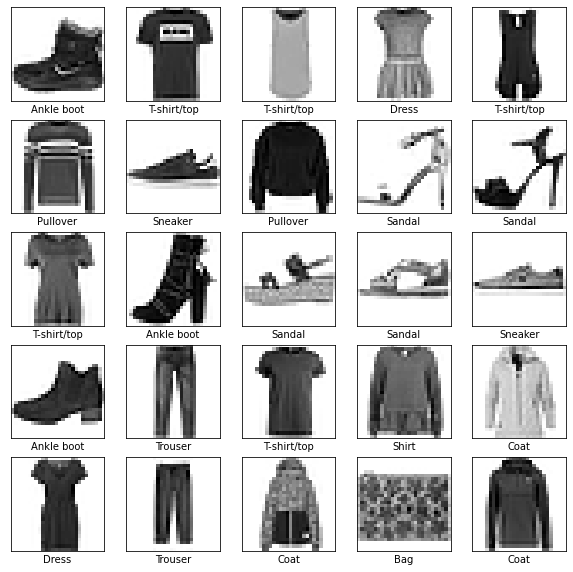

In [57]:
plt.figure(figsize=(10,10)) #設定圖型框架大小
for i in range(25): #迭代
    plt.subplot(5,5,i+1) #子圖在(5,5)內的位子為(i+1)
    plt.xticks([]) #將x的座標設為空
    plt.yticks([]) #將y的座標設為空
    plt.grid(False) #將網格取消 (預設為True) 但此範例沒差
    plt.imshow(train_images[i], cmap='binary') #二值化圖片 cmap='gray'|'gray_r'|binary
    plt.xlabel(class_names[train_labels[i]]) #將圖片附上對應分類名稱

In [58]:
#載入keras.Sequential順序模型 #適用於1輸入1輸出
#step1: 指定輸入數據尺寸 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#輸入層 #Flatten轉換成1D陣列
    tf.keras.layers.Dense(128, activation='relu'),#加入Dense隱藏層 128個神經元 用'relu'觸發函數
    tf.keras.layers.Dense(10, activation='softmax') #輸出層 10個神經元 #Softmax:科學記號表示
])
#tf.keras.utils.plot_model(model) #顯示模型架構
# model.summary() #None表示可為任意大小

In [59]:
#編譯模型compile來指定loss function和optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#sparse_categorical_crossentropy 適用於一個輸入只有一個標籤 也就是one-hot向量
#sparse_binary_crossentropy 適用二元分類(一或多個二元標籤) 且輸出層要用sigmoid函數計算

In [60]:
#訓練模型
history=model.fit(train_images, train_labels, epochs=30,verbose=0, validation_split=0.1)
#(特徵,目標,訓練次數,是否顯示進度條)
#validation_split= 傳遞資料集，可以自定義測試集比例

(0.0, 1.0)

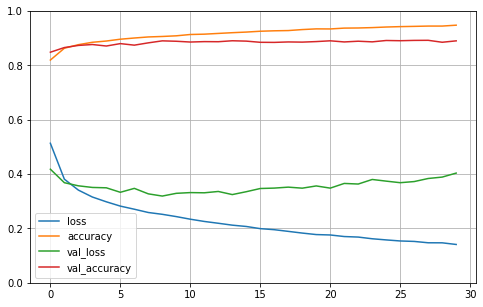

In [61]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True) #加網格
plt.gca().set_ylim(0,1) #將縱軸座標的範圍為0~1

In [73]:
#用測試集評估，估計類推誤差，再將模型部署到生產環境。
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.4216 - accuracy: 0.8899 - 355ms/epoch - 1ms/step
Test accuracy: 0.8899000287055969


In [96]:
#測試模型
predictions = model.predict(test_images) #用模型來預測測試集
predictions[0] #顯示第一個圖觀看結果

array([3.0531602e-09, 4.7322327e-11, 1.2952915e-10, 2.9172318e-17,
       2.6458946e-10, 7.3592361e-07, 2.1134144e-13, 6.9002254e-04,
       2.0405021e-10, 9.9930918e-01], dtype=float32)

In [64]:
np.argmax(predictions[0])

9

In [65]:
test_labels[0]

9

In [98]:
def plot_image(i, predictions_array, true_label, img):#標示圖名
  true_label, img = true_label[i], img[i] #呼叫已預測之圖與標籤
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap='binary')    #顯示並二值化圖片

  predicted_label = np.argmax(predictions_array) 
  #取predictions的array中最大的機率，並定義成預測標籤
  if predicted_label == true_label:     #若預測=真實標籤
    color = 'blue'                      #顏色為藍色
  else:                                 #若預測!=真實標籤
    color = 'red'                       #顏色為紅色

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], #{1}:預測的標籤
                                100*np.max(predictions_array), #{2}:匹配度
                                class_names[true_label]), #{3}: 真實的標籤
                                color=color) #套入上方顏色方便辨識

def plot_value_array(i, predictions_array, true_label): #建立accuracy bar
  true_label = true_label[i] #呼叫正確標籤
  plt.grid(False)
  plt.xticks(range(10)) #9個種類
  plt.yticks([]) #y軸不用標
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  #設置bar圖，將array所有值帶入並以灰色顯示
  plt.ylim([0, 1]) #y軸範圍設置0~1
  predicted_label = np.argmax(predictions_array) #找出最大機率者為預測標籤

  thisplot[predicted_label].set_color('red') #先畫上預測標籤
  thisplot[true_label].set_color('blue') #在畫上真實標籤，若一樣則會蓋過

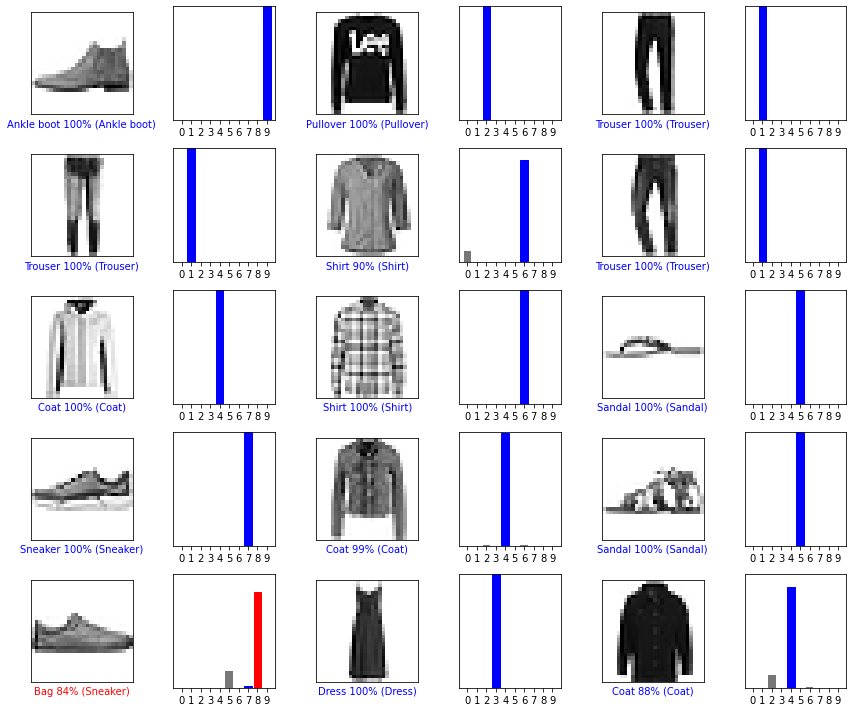

In [103]:
num_rows = 5 #定義列數
num_cols = 3 #定義行數
num_images = num_rows*num_cols #圖形總數
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) #定義圖型大小（給框架裝圖）
for i in range(num_images): #開始循環送圖進去
  plt.subplot(num_rows, 2*num_cols, 2*i+1)#定義子圖位置
  plot_image(i, predictions[i], test_labels, test_images)#值帶入函式plot_image
  plt.subplot(num_rows, 2*num_cols, 2*i+2)#定義子圖位置
  plot_value_array(i, predictions[i], test_labels)#值帶入函式plot_value_array
plt.tight_layout()#自動調整子圖參數

In [104]:
#開始使用訓練好的模型！！！
# Grab an image from the test dataset.
img = test_images[1]
print('img.shape:',img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print('expand_dims_img.shape:',img.shape)

predictions_single = model.predict(img) #預測這張圖
print('predictions_single:',predictions_single,sep='\n')

img.shape: (28, 28)
expand_dims_img.shape: (1, 28, 28)
predictions_single:
[[3.9280116e-05 2.1496537e-19 9.9980587e-01 4.0410346e-21 1.3656344e-04
  1.2261051e-15 1.8407902e-05 2.9239749e-17 3.0709144e-15 4.6515361e-15]]


In [105]:
np.argmax(predictions_single[0]) #這張圖最大機率的標籤

2

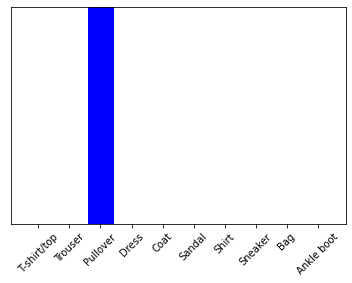

In [111]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45) #設定x軸(10行, 類別名, 轉45度)